In [1]:
import matplotlib.pyplot as plt
from random import choice
import networkx as nx
import pandas as pd
import numpy as np
import random
%matplotlib inline
font = {"fontsize": 12, 
        "family": "serif"}

In [11]:
#1234567890123456789012345678901234567890123456789012345678901234567890123456789
class SupplyChain():
    '''
    This class sets up a directed graph in NetworkX to set relationships
    for the visualization of a supply chain. The factories of the supply 
    chain are created through methods, and the data is aggregated in the
    other methods. The analysis is focused on how changes in the type of
    garment — sustainable vs. unsustainable - change the environmental
    impact of each factory. 
    '''

    def __init__(self, 
                 type_of_garment,
                 recycled_percent,
                 dates, 
                 input_emission_factor,
                 user
                 ):
       
        '''
        Inputs:
        
            type_of_garment (binary) The parameter can be personalized:
              (1) Sustainable (0) Unsustainable. 
            
            recycled_percent (int) The parameter can be personalized:
              any value between 0 and 100, indicating the percent of a 
              sustainable garment that is from recycled materials:  
            
            dates (year) The years of data that are analyzed. 
              Default: 2017. 
              
            input_emission_factory (float) The emission factor can be tuned
              to reflect the amount of CO2 released for 1kg of cotton.
            
            user (string) The user is the directory of the file and the data.
        '''
        
        
        self.type_of_garment = type_of_garment
        self.dates = dates
        self.recycled_percent = recycled_percent
        self.input_emission_factor = input_emission_factor
        self.user = user
    
        if self.type_of_garment == "Unsustainable":
            self.edge_data = pd.read_csv(user + 
                                         "data/data_final/factory_names/unsustainable_graph_names.csv")
            self.node_data = self.edge_data["SOURCE"]
            
        elif self.type_of_garment == "Sustainable":
            self.edge_data = pd.read_csv(user + 
                                         "data/data_final/factory_names/sustainable_graph_names.csv")
            self.node_data = self.edge_data["SOURCE"]
    
        self.supply_chain = nx.from_pandas_edgelist(df=self.edge_data, 
                                    source="SOURCE", 
                                    target="TARGET",
                                    create_using=nx.DiGraph())
    
        self.load_data() 
        
        
    def load_data(self):
        '''
        Loading all of the data for each factory including date, type, production, 
          fuel consumption, and emission factor. Once the data is loaded as individual 
          variables, the information is added to each node.
        '''
        for factory_name in self.supply_chain.nodes:
            self.data_var = pd.read_csv("data/data_final/data_" + factory_name + ".csv")
#             print(self.data_var)
            self.supply_chain.node[factory_name]["fuel_type"] = self.data_var["type"][0]
            self.supply_chain.node[factory_name]["unit_fuel"] = self.data_var["unit_fuel"][0]
            self.supply_chain.node[factory_name]["unit_production"] = \
                self.data_var["unit_production"][0]
            self.supply_chain.node[factory_name]["fuel_consumption"] = \
                self.data_var.loc[self.data_var["year"] == self.dates].fuel
            self.supply_chain.node[factory_name]["production"] = \
                self.data_var.loc[self.data_var["year"] == self.dates].production
            self.supply_chain.node[factory_name]["emission_factor"] = \
                self.data_var.loc[self.data_var["year"] == self.dates].emission_factor

    def observe(self):
        '''
        Draw the state of the network and create plots for the production and fuel 
          consumption.
        '''        
        pos = nx.circular_layout(self.supply_chain)
        nx.draw_networkx_nodes(self.supply_chain, pos, node_size = 500, with_labels=True,
                               node_color=[self.supply_chain.node[i]['production'][0] 
                                           for i in self.supply_chain.nodes],
                               edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1, alpha=0.7,
                               limits=plt.axis('off'))
        nx.draw_networkx_labels(self.supply_chain, pos)
        nx.draw_networkx_edges(self.supply_chain, pos, arrows=True)
        plt.show()   
        
    def plots(self):
        '''
        Plots are created to inspect the data and complete the initial understanding. 
        '''
        x = range(1,13)
#         for factory, fuel_per_garment in self.fuel_per_garment.items():
#             plt.plot(x, fuel_per_garment)
#             plt.title("Fueeeeeel")
#         plt.show()
        plt.plot(x, self.MAK_Knit_fuel_per_garment)
        plt.plot(x, self.TintColor_fuel_per_garment)
        plt.plot(x, self.MAK_Cut_fuel_per_garment)
        plt.plot(x, self.MCS_fuel_per_garment)
        plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS"))
        plt.xlabel("Month")
        plt.ylabel("Fuel Per Garment")
        plt.title(self.type_of_garment + " Fuel Per Garment Over Time")
        plt.show()
        
        plt.plot(x, self.MAK_Knit_tees)
        plt.plot(x, self.TintColor_tees)
        plt.plot(x, self.MAK_Cut_tees)
        plt.plot(x, self.MCS_tees)
        plt.plot(x, self.Cotton_tees)
        plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS", "Cotton"))
        plt.xlabel("Month")
        plt.ylabel("TEES MADE")
        plt.title("t-shirts produced")
        plt.show()
        
        plt.plot(x, self.MAK_Knit_impact)
        plt.plot(x, self.TintColor_impact)
        plt.plot(x, self.MAK_Cut_impact)
        plt.plot(x, self.MCS_impact)
#         plt.plot(x, self.Cotton_impact)
        plt.legend(("MAK Knit", "TintColor", "MAK Cut", "MCS"))
        plt.xlabel("Month")
        plt.ylabel("Kg CO2 Released")
        plt.title("KG of CO2 Released Per Month")
        plt.show()
        

    def Cotton_production(self):
        '''
        The total fuel consumed and the total production are used to calculate
          the number of garments, the fuel consumed per garment, the impact, and 
          the impact per garment for Cotton. The impact of TintColor is 
          dependent on if the cotton production is sustainable or unsustainable. 
        '''
        Cotton_node_name = None
        for node_name in self.supply_chain.nodes:  # check synax
            if 'cotton' in node_name.lower():
                Cotton_node_name = node_name
                break
                
        self.supply_chain.node[Cotton_node_name]["emission_factor"] = self.input_emission_factor
        self.Cotton_production = self.supply_chain.node[Cotton_node_name]["production"]
        self.Cotton_emission_factor = self.supply_chain.node[Cotton_node_name]["emission_factor"]
        
        self.Cotton_tees = self.Cotton_production / 0.17
        
        if self.type_of_garment == "Sustainable":
            self.Cotton_impact = ((self.Cotton_emission_factor * self.Cotton_production) * 
                                  ((100 - self.recycled_percent) / 100))
        else:
            self.Cotton_impact = self.Cotton_emission_factor * self.Cotton_production

        self.Cotton_impact_per_garment = self.Cotton_impact / self.Cotton_tees
        
#         print("Cotton Kilograms of CO2 Per Garment", self.Cotton_impact_per_garment)
    
    def MAK_Knit_production(self):
        '''
        The total fuel consumed and the total production are used to calculate
          the number of garments, the fuel consumed per garment, the impact, and 
          the impact per garment for MAK Knit. 
        '''
        self.MAK_Knit_fuel_consume = self.supply_chain.node["MAK_Knit"]["fuel_consumption"]
        self.MAK_Knit_production = self.supply_chain.node["MAK_Knit"]["production"]
        self.MAK_Knit_emission_factor = self.supply_chain.node["MAK_Knit"]["emission_factor"]
       
        self.MAK_Knit_tees = self.MAK_Knit_production / 0.25
        self.MAK_Knit_fuel_per_garment = 0.25 * self.MAK_Knit_fuel_consume / self.MAK_Knit_production
        self.MAK_Knit_impact = self.MAK_Knit_emission_factor * self.MAK_Knit_fuel_consume
        self.MAK_Knit_impact_per_garment = self.MAK_Knit_impact / self.MAK_Knit_tees
        
#         print("MAK Knit " + self.supply_chain.node["MAK_Knit"]["unit_fuel"] + 
#               " of " + self.supply_chain.node["MAK_Knit"]["fuel_type"] + " Per Garment")
#         print(self.MAK_Knit_fuel_per_garment)
        
    def TintColor_production(self):
        '''
        The total fuel consumed and the total production are used to calculate
          the number of garments, the fuel consumed per garment, the impact, and 
          the impact per garment for TintColor. The impact of TintColor is 
          dependent on if the supply chain is sustainable or unsustainable. 
        '''
        self.TintColor_fuel_consume = self.supply_chain.node["TintColor"]["fuel_consumption"]
        self.TintColor_production = self.supply_chain.node["TintColor"]["production"]
        self.TintColor_emission_factor = self.supply_chain.node["TintColor"]["emission_factor"]
        
        self.TintColor_tees = self.TintColor_production / 0.25
        
        if self.type_of_garment == "Sustainable":
            self.TintColor_fuel_per_garment = 0.2 * (0.25 * self.TintColor_fuel_consume / self.TintColor_tees)
            self.TintColor_impact = 0.2 * (self.TintColor_emission_factor * self.TintColor_fuel_consume)
        else: 
            self.TintColor_fuel_per_garment = (0.25 * self.TintColor_fuel_consume / self.TintColor_tees)
            self.TintColor_impact = self.TintColor_emission_factor * self.TintColor_fuel_consume
        
        self.TintColor_impact_per_garment = self.TintColor_impact / self.TintColor_tees
        
#         print("TintColor " + self.supply_chain.node["TintColor"]["unit_fuel"] 
#               + " of " + self.supply_chain.node["TintColor"]["fuel_type"] + " Per Garment")
#         print(self.TintColor_fuel_per_garment)
        
    def MAK_Cut_production(self):
        '''
        The total fuel consumed and the total production are used to calculate
          the number of garments, the fuel consumed per garment, the impact, and 
          the impact per garment for MAK Cut. 
        '''
        self.MAK_Cut_fuel_consume = self.supply_chain.node["MAK_Cut"]["fuel_consumption"]
        self.MAK_Cut_production = self.supply_chain.node["MAK_Cut"]["production"]
        self.MAK_Cut_emission_factor = self.supply_chain.node["MAK_Cut"]["emission_factor"]
        
        self.MAK_Cut_tees = self.MAK_Cut_production / 0.25
        self.MAK_Cut_fuel_per_garment = 0.2 * self.MAK_Cut_fuel_consume / self.MAK_Cut_production
        self.MAK_Cut_impact = self.MAK_Cut_emission_factor * self.MAK_Cut_fuel_consume
        self.MAK_Cut_impact_per_garment = self.MAK_Cut_impact / self.MAK_Cut_tees
        
#         print("MAK Cut " + self.supply_chain.node["MAK_Cut"]["unit_fuel"] + 
#               " of " + self.supply_chain.node["MAK_Cut"]["fuel_type"] + " Per Garment")
#         print(self.MAK_Cut_fuel_per_garment)
        
    def MCS_production(self):
        '''
        The total fuel consumed and the total production are used to calculate
          the number of garments, the fuel consumed per garment, the impact, and 
          the impact per garment for MCS. 
        '''
        self.MCS_fuel_consume = self.supply_chain.node["MCS"]["fuel_consumption"]
        self.MCS_production = self.supply_chain.node["MCS"]["production"]
        self.MCS_emission_factor = self.supply_chain.node["MCS"]["emission_factor"]
        
        self.MCS_tees = self.MCS_production / 0.2
        self.MCS_fuel_per_garment = 0.2 * self.MCS_fuel_consume / self.MCS_production
        self.MCS_impact = self.MCS_emission_factor * self.MCS_fuel_consume
        self.MCS_impact_per_garment = self.MCS_impact / self.MCS_tees
        
#         print("MCS " + self.supply_chain.node["MCS"]["unit_fuel"] + 
#               " of " + self.supply_chain.node["MCS"]["fuel_type"] + " Per Garment")
#         print(self.MCS_fuel_per_garment)
            
    def aggregate_impact_per_garment(self):
        '''
        The monthly monthly impact, and the monthly impact per garment are calculated.
        '''
        monthly_impact = (self.Cotton_impact + 
                          self.MAK_Knit_impact + 
                          self.TintColor_impact + 
                          self.MAK_Cut_impact + 
                          self.MCS_impact)
        monthly_impact_per_garment = (self.Cotton_impact_per_garment + 
                                      self.MAK_Knit_impact_per_garment + 
                                      self.TintColor_impact_per_garment + 
                                      self.MAK_Cut_impact_per_garment + 
                                      self.MCS_impact_per_garment)
        average_impact_per_garment = np.mean(monthly_impact_per_garment)
        return(average_impact_per_garment)
    
    def aggregate_impact(self):
        total_impact = (sum(self.Cotton_impact) + 
                          sum(self.MAK_Knit_impact) + 
                          sum(self.TintColor_impact) + 
                          sum(self.MAK_Cut_impact) + 
                          sum(self.MCS_impact))
        return(total_impact)
    

# Calculating Results

In [29]:
'''
The total CO2 produced in 2017 for different percentage recycled cotton 
  is calculated, and compared to the impact of a conventional cotton
  garment and supply chain.
'''
# AVERAGE COTTON VALUE RECYCLED
recycled_emissions = []
aggregate_recycled_emissions = []

recycled_percent = [99.9, 40, 20]
org_cotton_e_factors = [3.913, .978, 2.380]
for amount in recycled_percent:
    for emission in org_cotton_e_factors:
        sustain = SupplyChain("Sustainable", amount, 2017, emission, user)
        sustain.Cotton_production()
        sustain.MAK_Knit_production()
        sustain.TintColor_production()
        sustain.MAK_Cut_production()
        sustain.MCS_production()
        recycled_emissions.append((sustain.aggregate_impact_per_garment()))
        aggregate_recycled_emissions.append((sustain.aggregate_impact()))

# AVERAGE COTTON VALUE CONVENTIONAL
conventional_emissions = []
aggregate_conventional_emissions = []

conv_cotton_e_factor = [7.28, 1.808, 4.5364]
for emission in conv_cotton_e_factor:
    sustain = SupplyChain("Unsustainable", 0, 2017, emission, user)
    sustain.Cotton_production()
    sustain.MAK_Knit_production()
    sustain.TintColor_production()
    sustain.MAK_Cut_production()
    sustain.MCS_production()
    conventional_emissions.append((sustain.aggregate_impact_per_garment()))
    aggregate_conventional_emissions.append((sustain.aggregate_impact()))

[recycled_emissions.append(i) for i in conventional_emissions]
[aggregate_recycled_emissions.append(i) for i in aggregate_conventional_emissions]

# Recycled Cotton Emissions Per Garment
recyce_emissions = recycled_emissions
conventional_emissions = recycled_emissions[-1]

emissions_percent_of_conventional = []
for x in range(len(recyce_emissions)):
    print(recyce_emissions[x])
    emissions_percent_of_conventional.append(recyce_emissions[x] / conventional_emissions)
print(emissions_percent_of_conventional)

# Recycled Cotton Emissions Total
recyce_emissions_tot = aggregate_recycled_emissions
conventional_emissions = aggregate_recycled_emissions[-1]

agg_emissions_percent_of_conventional = []
for x in range(len(recyce_emissions_tot)):
    print(recyce_emissions_tot[x])
    agg_emissions_percent_of_conventional.append(recyce_emissions_tot[x] / conventional_emissions)
print(agg_emissions_percent_of_conventional)

[None, None, None]

# Sensitivity Analysis

In [67]:
max_emissions = recycled_emissions[::3]
min_emissions = recycled_emissions[1::3]
ave_emissions = recycled_emissions[2::3] 

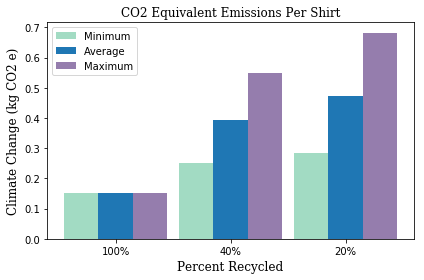

In [68]:
'''
The emissions per garment for sustainable garments are plotted. 
''' 

N = 3

ind = np.arange(N) 
width = 0.3       

max_in = [0, 3, 6]
min_in = [1, 4, 7]
ave_in = [2, 5, 8]

plt.bar(ind, [recycled_emissions[i] for i in min_in], width, label='Minimum', color='#A2DBC3')
plt.bar(ind + width, [recycled_emissions[i] for i in ave_in], width, label='Average')
plt.bar(ind + 2 * width, [recycled_emissions[i] for i in max_in], width, label='Maximum', color='#957DAD')
# plt.bar(ind + 3 * width, [conventional_emissions[i] for i in ])

plt.xlabel("Percent Recycled", **font)
plt.ylabel('Climate Change (kg CO2 e)', **font)
plt.title('CO2 Equivalent Emissions Per Shirt', **font)

plt.xticks(ind + 2 * width / 2, ('100%', '40%', '20%', '0%'))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("images/bar_co2_per_shirt_cotton.png")
plt.show()

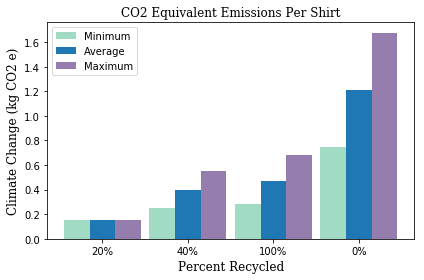

In [9]:
'''
The emissions per garment for sustainable and unsustainable garments are plotted. 
''' 
N_init = 4

ind = np.arange(N_init) 
width = 0.3       
plt.bar(ind, min_emissions, width, label='Minimum', color='#A2DBC3')
plt.bar(ind + width, ave_emissions, width, label='Average')
plt.bar(ind + 2 * width, max_emissions, width, label='Maximum', color='#957DAD')

plt.xlabel("Percent Recycled", **font)
plt.ylabel('Climate Change (kg CO2 e)', **font)
plt.title('CO2 Equivalent Emissions Per Shirt', **font)

plt.xticks(ind + 2 * width / 2, ('20%', '40%', '100%', '0%'))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("images/bar_co2_per_shirt_variation.png")
plt.show()

# Plotting Emissions by Percent Recycled

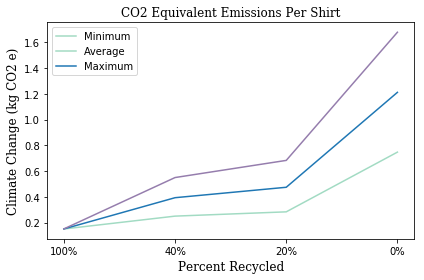

In [10]:
N = 4

ind = np.arange(N) 
width = 0.3       

x = [0, 1, 2, 3]
max_in = [0, 3, 6, 9]
min_in = [1, 4, 7, 10]
ave_in = [2, 5, 8, 11]

plt.plot(x, [recycled_emissions[i] for i in min_in], width, color='#A2DBC3')
plt.plot(x, [recycled_emissions[i] for i in ave_in], width)
plt.plot(x, [recycled_emissions[i] for i in max_in], width, color='#957DAD')
# plt.bar(ind + 3 * width, [conventional_emissions[i] for i in ])

plt.xlabel("Percent Recycled", **font)
plt.ylabel('Climate Change (kg CO2 e)', **font)
plt.title('CO2 Equivalent Emissions Per Shirt', **font)

plt.xticks(x, ('100%', '40%', '20%', '0%'))
plt.legend(["Minimum", "Average", "Maximum"], loc='best')
plt.tight_layout()
plt.savefig("images/line_co2_per_shirt_cotton.png")
plt.show()

In [52]:
# AVERAGE COTTON VALUE RECYCLED
total_emissions = []
recycled_percent = list(reversed(range(100)))
org_cotton_e_factors = [3.913, .978, 2.380]
for amount in recycled_percent:
    for emission in org_cotton_e_factors:
        sustain = SupplyChain("Sustainable", amount, 2017, emission, user)
        sustain.Cotton_production()
        sustain.MAK_Knit_production()
        sustain.TintColor_production()
        sustain.MAK_Cut_production()
        sustain.MCS_production()
    #     sustain.aggregate_impact()
        total_emissions.append((sustain.aggregate_impact_per_garment()))

conventional_emissions = []
conv_cotton_e_factor = [7.28, 1.808, 4.5364]
for emission in conv_cotton_e_factor:
    sustain = SupplyChain("Unsustainable", 0, 2017, emission, user)
    sustain.Cotton_production()
    sustain.MAK_Knit_production()
    sustain.TintColor_production()
    sustain.MAK_Cut_production()
    sustain.MCS_production()
    conventional_emissions.append((sustain.aggregate_impact_per_garment()))


In [53]:
max_emissions = total_emissions[::3]
min_emissions = total_emissions[1::3]
ave_emissions = total_emissions[2::3] 

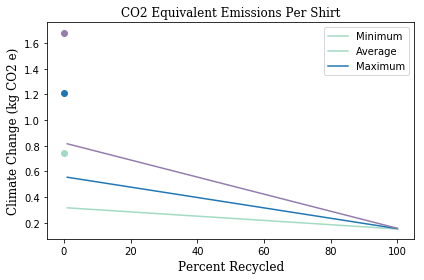

In [54]:
x = list(reversed(range(1, 101)))

plt.scatter(0, conventional_emissions[2])
plt.scatter(0, conventional_emissions[1], color='#A2DBC3')
plt.scatter(0, conventional_emissions[0], color='#957DAD')

plt.plot(x, min_emissions, width, color='#A2DBC3', label="Minimum")
plt.plot(x, ave_emissions, width, label="Average")
plt.plot(x, max_emissions, width, color='#957DAD', label="Maximum")

plt.xlabel("Percent Recycled", **font)
plt.ylabel('Climate Change (kg CO2 e)', **font)
plt.title('CO2 Equivalent Emissions Per Shirt', **font)

plt.legend(["Minimum", "Average", "Maximum"])
plt.tight_layout()
plt.savefig("images/line_co2_per_shirt_cotton.png")
plt.show()

# Initial Inspection

In [55]:
emissions = []
x = list(reversed(range(0, 110, 10)))
for recycled_percentage in x:
    sustain = SupplyChain("Sustainable", recycled_percentage, 2017, org_cotton_e_factors[0], user)
    sustain.Cotton_production()
    sustain.MAK_Knit_production()
    sustain.TintColor_production()
    sustain.MAK_Cut_production()
    sustain.MCS_production()
#     sustain.aggregate_impact()
    emissions.append(np.mean(sustain.aggregate_impact_per_garment()))
    # Y.append(float(sustain.aggregate_impact()))

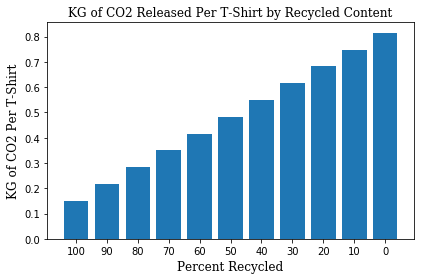

In [56]:
x = range(len(emissions))
plt.bar(x, emissions)
plt.xticks(x, list(reversed(range(0, 110, 10)))) 
plt.xlabel("Percent Recycled", **font)
plt.ylabel("KG of CO2 Per T-Shirt", **font)
plt.title("KG of CO2 Released Per T-Shirt by Recycled Content", **font)
plt.tight_layout()
plt.savefig("images/co2_perc_recycled.png")
plt.show()
# plt.plot(x, )